In [1]:
# Pull from coinmarketcap API using API Key
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3a42ee6b-f434-4013-bf99-802d817e1d06',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# normalize json data and add a timestamp column
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now', utc='true')

In [5]:
# function to automate pulling from the API
def api_pull():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3a42ee6b-f434-4013-bf99-802d817e1d06',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now', utc='true')
    df_append = pd.DataFrame(df2) #append each pull to the current dataframe
    df = pd.concat([df,df_append])
    

In [6]:
import os
from time import time
from time import sleep

# activate api pull function every 60 seconds
for i in range(20):
    api_pull()
    print('API Pull Successful')
    sleep(60)
exit()

API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful
API Pull Successful


In [7]:
df.head(15)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10866,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965191e+07,1.965191e+07,False,NaN,1,None,None,None,2024-03-12T04:12:00.000Z,71677.073478,6.360726e+10,68.5610,-0.561617,4.336749,5.186794,48.202970,55.927479,75.588204,1.408592e+12,52.1616,1.505219e+12,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
1,1027,Ethereum,ETH,ethereum,8526,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200935e+08,1.200935e+08,True,NaN,2,None,None,None,2024-03-12T04:12:00.000Z,4034.715509,2.783673e+10,56.6207,-0.389219,4.295485,8.040767,59.614501,55.632904,86.816072,4.845430e+11,17.9431,4.845430e+11,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
2,825,Tether USDt,USDT,tether,77765,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.024344e+11,1.067971e+11,True,NaN,3,None,None,None,2024-03-12T04:11:00.000Z,0.999505,1.153661e+11,38.8196,-0.068539,-0.084798,-0.183301,-0.078785,-0.051257,-0.008975,1.023837e+11,3.7878,1.067443e+11,None,2024-03-12T04:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-12 04:13:35.543562+00:00
3,1839,BNB,BNB,bnb,2089,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495398e+08,1.495398e+08,False,NaN,4,None,None,None,2024-03-12T04:11:00.000Z,532.259790,3.582519e+09,-29.5723,0.076721,1.800314,25.997343,64.348283,70.871050,116.941740,7.959403e+10,2.9447,7.959403e+10,None,2024-03-12T04:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.435378e+08,5.716943e+08,True,NaN,5,None,None,None,2024-03-12T04:12:00.000Z,149.977773,5.383434e+09,36.5199,-1.469962,6.137074,14.265907,36.576089,52.787473,128.904195,6.652081e+10,2.4633,8.574144e+10,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
5,52,XRP,XRP,xrp,1246,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.473683e+10,9.998782e+10,False,NaN,6,None,None,None,2024-03-12T04:12:00.000Z,0.688332,7.132290e+09,307.4444,-2.342286,13.216774,5.277881,30.544322,15.088610,13.594016,3.767713e+10,1.3952,6.883324e+10,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
6,3408,USDC,USDC,usd-coin,17163,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.047579e+10,3.047579e+10,False,NaN,7,None,None,None,2024-03-12T04:12:00.000Z,0.999912,1.174773e+10,49.5048,-0.006426,-0.007349,0.026201,-0.000668,0.019124,-0.036369,3.047312e+10,1.1285,3.047312e+10,None,2024-03-12T04:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-12 04:13:35.543562+00:00
7,2010,Cardano,ADA,cardano,1092,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.555082e+10,3.670029e+10,False,NaN,8,None,None,None,2024-03-12T04:11:00.000Z,0.757998,1.313382e+09,80.4465,-1.410090,6.314614,-1.741109,34.833359,31.021771,36.147192,2.694744e+10,0.9969,3.410989e+10,None,2024-03-12T04:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
8,74,Dogecoin,DOGE,dogecoin,916,2013-12-15T00

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
# Create a list of percent changes
pct_change = ('quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
              'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d')
type(pct_change)

pct_change = list(pct_change)

pct_change

['quote.USD.percent_change_1h',
 'quote.USD.percent_change_24h',
 'quote.USD.percent_change_7d',
 'quote.USD.percent_change_30d',
 'quote.USD.percent_change_60d',
 'quote.USD.percent_change_90d']

In [10]:
# Create a dataframe for percent changes
df_pct_change = df.groupby('name', sort=False)[(pct_change)].mean()
df_pct_change = df_pct_change.stack()
df_pct_change=df_pct_change.to_frame(name='values')
df_pct_change.head(15)

values
name                                             
Bitcoin     quote.USD.percent_change_1h   0.05682
            quote.USD.percent_change_24h  4.72644
            quote.USD.percent_change_7d   5.82859
            quote.USD.percent_change_30d 48.55025
            quote.USD.percent_change_60d 56.25189
            quote.USD.percent_change_90d 76.37435
Ethereum    quote.USD.percent_change_1h  -0.11472
            quote.USD.percent_change_24h  4.60796
            quote.USD.percent_change_7d   8.62983
            quote.USD.percent_change_30d 59.77189
            quote.USD.percent_change_60d 55.59935
            quote.USD.percent_change_90d 87.34028
Tether USDt quote.USD.percent_change_1h  -0.01989
            quote.USD.percent_change_24h -0.04081
            quote.USD.percent_change_7d  -0.12118

In [11]:
# Fix index and clean dataset
count_df=int(df_pct_change.count())
index=pd.Index(range(count_df))

df_pct_change = df_pct_change.reset_index()

df_pct_change=df_pct_change.rename(columns={'level_1': 'period'})

df_pct_change=df_pct_change.rename(columns={'values': 'percent_change'})

df_pct_change['period']=df_pct_change['period'].replace(['quote.USD.percent_change_1h',
                                  'quote.USD.percent_change_24h',
                                  'quote.USD.percent_change_7d',
                                  'quote.USD.percent_change_30d',
                                  'quote.USD.percent_change_60d',
                                  'quote.USD.percent_change_90d'],
                                  ['1h','24h', '7d', '30d', '60d', '90d'])

df_pct_change.head(15)

,name,period,percent_change
0,Bitcoin,1h,0.05682
1,Bitcoin,24h,4.72644
2,Bitcoin,7d,5.82859
3,Bitcoin,30d,48.55025
4,Bitcoin,60d,56.25189
5,Bitcoin,90d,76.37435
6,Ethereum,1h,-0.11472
7,Ethereum,24h,4.60796
8,Ethereum,7d,8.62983
9,Ethereum,30d,59.77189


In [12]:
import matplotlib.pyplot as plt

import seaborn as sns

In [13]:
# Create a list with unique ordered symbols
symbols = df['symbol']
names = df['name']
symbol_dict = dict(zip(names, symbols))
symbol_list = symbol_dict.values()

df_symbol=pd.DataFrame(symbol_list)

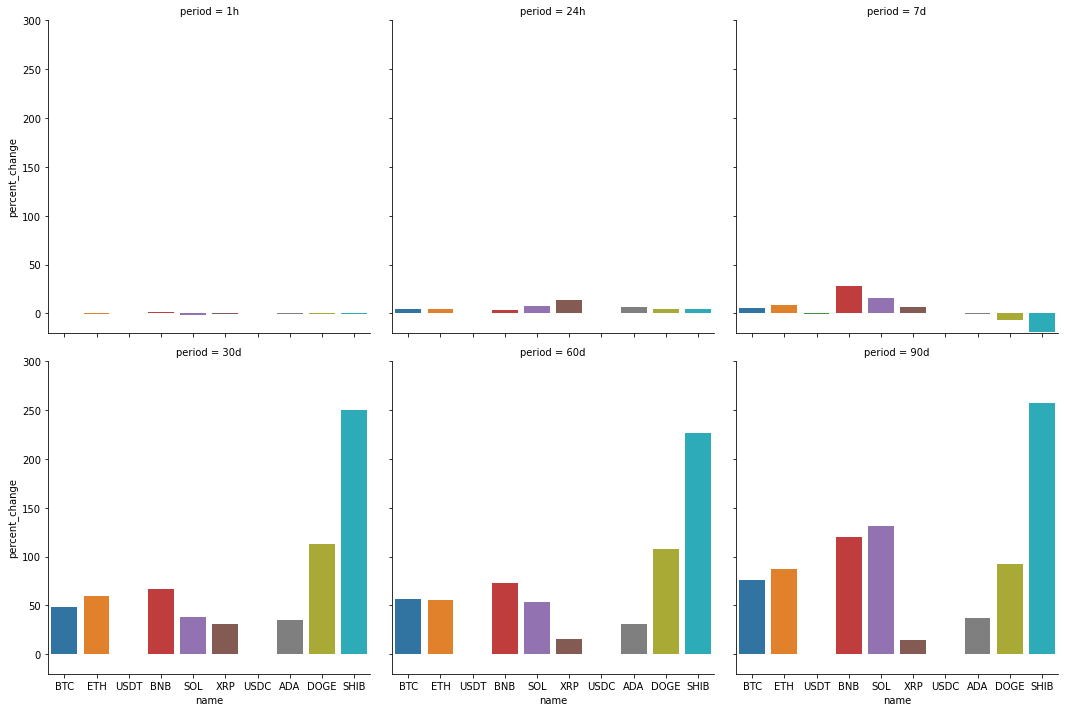

In [14]:
# making bar plots to show the percentage changes for each cryptocurrency over 6 different time periods
sns.catplot(x='name', y='percent_change', col='period', col_wrap=3,
            hue='name', data=df_pct_change, kind='bar',
            dodge=False).set_xticklabels(df_symbol[0]).set(ylim=(-20, 300))

In [15]:
# create time series dataset of price
df_usd_price=df[['name','quote.USD.price','timestamp']]
df_usd_price.head(15)

,name,quote.USD.price,timestamp
0,Bitcoin,71677.07348,2024-03-12 04:13:35.543562+00:00
1,Ethereum,4034.71551,2024-03-12 04:13:35.543562+00:00
2,Tether USDt,0.99950,2024-03-12 04:13:35.543562+00:00
3,BNB,532.25979,2024-03-12 04:13:35.543562+00:00
4,Solana,149.97777,2024-03-12 04:13:35.543562+00:00
5,XRP,0.68833,2024-03-12 04:13:35.543562+00:00
6,USDC,0.99991,2024-03-12 04:13:35.543562+00:00
7,Cardano,0.75800,2024-03-12 04:13:35.543562+00:00
8,Dogecoin,0.17358,2024-03-12 04:13:35.543562+00:00
9,Shiba Inu,0.00003,2024-03-12 04:13:35.543562+00:00


In [16]:
# Create individual timeseries datasets for the top 4 coins
df_bit=df_usd_price.query("name=='Bitcoin'")
df_eth=df_usd_price.query("name=='Ethereum'")
df_usdt=df_usd_price.query("name=='Tether USDt'")
df_bnb=df_usd_price.query("name=='BNB'")

In [17]:
# rename all the price columns for clarity
df_bit2=df_bit.rename(columns = {'quote.USD.price':'price'}) 
df_eth2=df_eth.rename(columns = {'quote.USD.price':'price'})
df_usdt2=df_usdt.rename(columns = {'quote.USD.price':'price'})
df_bnb2=df_bnb.rename(columns = {'quote.USD.price':'price'})

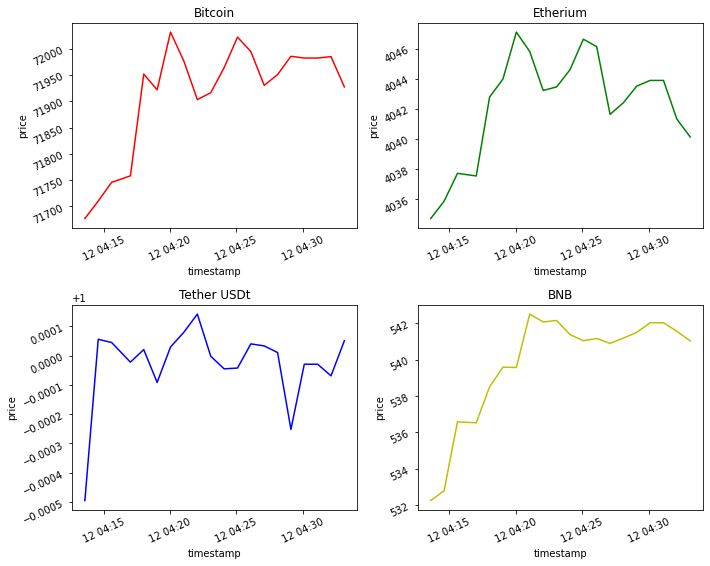

In [18]:
# Create timeseries subplots for each of the 4 cryptocurrencies
df_bit2 = df_bit2.reset_index()
df_eth2 = df_eth2.reset_index()
df_usdt2 = df_usdt2.reset_index()
df_bnb2 = df_bnb2.reset_index()

fig,ax =  plt.subplots( 2, 2, 
                       figsize = ( 10, 8)) 
  
sns.lineplot( x = 'timestamp', y = 'price',  
             color = 'r', data = df_bit2,  
             ax = ax[0][0]).set(title='Bitcoin')
  
ax[0][0].tick_params(labelrotation = 25) 
sns.lineplot( x = 'timestamp', y = 'price',  
             color = 'g', data = df_eth2, 
             ax = ax[0][1]).set(title='Etherium') 
  
ax[0][1].tick_params(labelrotation = 25) 
sns.lineplot(x = 'timestamp', y = 'price',  
             color = 'b', data = df_usdt2, 
             ax = ax[1][0]).set(title='Tether USDt')
  
ax[1][0].tick_params(labelrotation = 25) 
  
sns.lineplot(x = 'timestamp', y = 'price',  
             color = 'y', data = df_bnb2,  
             ax = ax[1][1]).set(title='BNB')
  
ax[1][1].tick_params(labelrotation = 25) 
fig.tight_layout(pad = 1.2) 

In [19]:
df.head(15)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10866,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19651912.00000,19651912.00000,False,NaN,1,None,None,None,2024-03-12T04:12:00.000Z,71677.07348,63607262189.91374,68.56100,-0.56162,4.33675,5.18679,48.20297,55.92748,75.58820,1408591540413.06421,52.16160,1505218543044.28003,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
1,1027,Ethereum,ETH,ethereum,8526,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120093478.75427,120093478.75427,True,NaN,2,None,None,None,2024-03-12T04:12:00.000Z,4034.71551,27836726248.57996,56.62070,-0.38922,4.29549,8.04077,59.61450,55.63290,86.81607,484543021281.20770,17.94310,484543021281.21002,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
2,825,Tether USDt,USDT,tether,77765,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,102434373085.14607,106797122778.30690,True,NaN,3,None,None,None,2024-03-12T04:11:00.000Z,0.99950,115366126304.63565,38.81960,-0.06854,-0.08480,-0.18330,-0.07879,-0.05126,-0.00898,102383663535.49756,3.78780,106744253474.41000,None,2024-03-12T04:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-12 04:13:35.543562+00:00
3,1839,BNB,BNB,bnb,2089,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149539808.83438,149539808.83438,False,NaN,4,None,None,None,2024-03-12T04:11:00.000Z,532.25979,3582519467.46942,-29.57230,0.07672,1.80031,25.99734,64.34828,70.87105,116.94174,79594027236.99870,2.94470,79594027237.00000,None,2024-03-12T04:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443537801.08244,571694338.90171,True,NaN,5,None,None,None,2024-03-12T04:12:00.000Z,149.97777,5383434274.21289,36.51990,-1.46996,6.13707,14.26591,36.57609,52.78747,128.90419,66520811854.79552,2.46330,85741444052.17000,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
5,52,XRP,XRP,xrp,1246,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,None,None,None,2024-03-12T04:12:00.000Z,0.68833,7132289596.73320,307.44440,-2.34229,13.21677,5.27788,30.54432,15.08861,13.59402,37677129379.41646,1.39520,68833237778.16000,None,2024-03-12T04:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-12 04:13:35.543562+00:00
6,3408,USDC,USDC,usd-coin,17163,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30475791407.30297,30475791407.30297,False,NaN,7,None,None,None,2024-03-12T04:12:00.000Z,0.99991,11747734987.99141,49.50480,-0.00643,-0.00735,0.02620,-0.00067,0.01912,-0.03637,30473120921.96843,1.12850,30473120921.97000,None,2024-03-12T04:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-12 04:13:35.543562+00:00
7,2010,Cardano,ADA,cardano,1092,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35550823994.91600,36700287535.80100,False,NaN,8,None,None,None,2024-03-12T04:11:00.000Z,0.75800,1313381747.10830,80.44650,-1.41009,6.31461,-1.74111,34.83336,31.02177,36.14719,26

In [20]:
# create new dataset with subset of columns and clean 
df_clean =df[['name', 'symbol', 'circulating_supply', 'total_supply', 'infinite_supply', 'quote.USD.price',
             'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
              'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d',
              'timestamp']]

df_clean =df_clean.rename(columns = {'quote.USD.price':'price'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_1h': '1h_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_24h': '24_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_7d': '7d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_30d': '30d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_60d': '60d_percent_change'})
df_clean =df_clean.rename(columns={'quote.USD.percent_change_90d': '90d_percent_change'})

# Remove seconds and milliseconds from date
df_clean['timestamp'] =df_clean['timestamp'].dt.floor('Min')
# Limit Price to 2 decimal places
df_clean['price'] = df_clean['price'].apply(lambda x: round(x, 2))

df_clean.head(15)

,name,symbol,circulating_supply,total_supply,infinite_supply,price,1h_percent_change,24_percent_change,7d_percent_change,30d_percent_change,60d_percent_change,90d_percent_change,timestamp
0,Bitcoin,BTC,19651912.00000,19651912.00000,False,71677.07000,-0.56162,4.33675,5.18679,48.20297,55.92748,75.58820,2024-03-12 04:13:00+00:00
1,Ethereum,ETH,120093478.75427,120093478.75427,True,4034.72000,-0.38922,4.29549,8.04077,59.61450,55.63290,86.81607,2024-03-12 04:13:00+00:00
2,Tether USDt,USDT,102434373085.14607,106797122778.30690,True,1.00000,-0.06854,-0.08480,-0.18330,-0.07879,-0.05126,-0.00898,2024-03-12 04:13:00+00:00
3,BNB,BNB,149539808.83438,149539808.83438,False,532.26000,0.07672,1.80031,25.99734,64.34828,70.87105,116.94174,2024-03-12 04:13:00+00:00
4,Solana,SOL,443537801.08244,571694338.90171,True,149.98000,-1.46996,6.13707,14.26591,36.57609,52.78747,128.90419,2024-03-12 04:13:00+00:00
5,XRP,XRP,54736825690.00000,99987824103.00000,False,0.69000,-2.34229,13.21677,5.27788,30.54432,15.08861,13.59402,2024-03-12 04:13:00+00:00
6,USDC,USDC,30475791407.30297,30475791407.30297,False,1.00000,-0.00643,-0.00735,0.02620,-0.00067,0.01912,-0.03637,2024-03-12 04:13:00+00:00
7,Cardano,ADA,35550823994.91600,36700287535.80100,False,0.76000,-1.41009,6.31461,-1.74111,34.83336,31.02177,36.14719,2024-03-12 04:13:00+00:00
8,Dogecoin,DOGE,143431896383.70520,143431896383.70520,True,0.17000,-1.76440,4.30952,-10.24444,111.27715,107.28794,90.28202,2024-03-12 04:13:00+00:00
9,Shiba Inu,SHIB,589289410812691.00000,589534086491242.25000,False,0.00000,-1.36186,3.43217,-22.04347,248.20263,224.28945,254.38739,2024-03-12 04:13:00+00:00


In [21]:
#Export Dataset to csv
df_clean.to_csv(r'/Users/jeremiahanderson/Documents/projects/python/crypto_api/crypto.csv', header='column_names')